# Introdução ao problema

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

# Abrindo o arquivo e estudando informações gerais

## Importando bibliotecas e abrindo o arquivo de jogos

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import seaborn as sns


In [2]:
df_games = pd.read_csv('datasets/games.csv')

## Imprimindo informações sobre o dataframe

In [3]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Existem valores nulos nas colunas Name, Year_of_Release, Genre, Critic_Score, User_Score e Rating. Além disso, a coluna Year_of_Release está em float64, quando deveria ser do tipo Int64, e a coluna User_Score é do tipo object, quando deveria ser float64. Por fim, os nomes das colunas não estão padronizados em minúsculo.

# Preparando os dados

## Alterando os nomes das colunas

In [4]:
df_games.rename(str.lower, axis='columns', inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Mudando os tipos das colunas

### Coluna year_of_release

In [5]:
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Coluna user_score

In [6]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## Lidando com valores ausentes

### Coluna name

In [7]:
print(df_games[df_games['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN  


As entradas ausentes da coluna name serão deletadas, pois possuem muitas outras colunas ausentes.

In [8]:
df_games.dropna(subset='name', inplace=True)
print(df_games[df_games['name'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


### Coluna year_of_release

In [9]:
print(df_games[df_games['year_of_release'].isna()])

                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2             <NA>   
377                     FIFA Soccer 2004      PS2             <NA>   
456           LEGO Batman: The Videogame      Wii             <NA>   
475           wwe Smackdown vs. Raw 2006      PS2             <NA>   
609                       Space Invaders     2600             <NA>   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP             <NA>   
16405                      Freaky Flyers       GC             <NA>   
16448                          Inversion       PC             <NA>   
16458        Hakuouki: Shinsengumi Kitan      PS3             <NA>   
16522                       Virtua Quest       GC             <NA>   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

A coluna de ano não tem um boa maneira de ser preenchida de forma que não atrapalhe as análises, portanto as entradas sem ano de lançamento serão deletadas.

In [10]:
df_games.dropna(subset='year_of_release', inplace=True)
print(df_games[df_games['year_of_release'].isna()])
df_games.info()
df_games.head(10)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Colunas critic_score e user_score

In [11]:
print(df_games[df_games['critic_score'].isna()])
print(df_games[df_games['user_score'].isna()])

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

A melhor forma de preencher os vazios nas colunas de pontuação da crítica e dos usuários é usando a média, de forma a afetar minimamente resultados posteriores.

In [12]:
critic_mean = df_games['critic_score'].mean()
user_mean = df_games['user_score'].mean()

In [13]:
df_games.fillna(value={'critic_score': critic_mean, 'user_score': user_mean}, inplace=True)
print(df_games[df_games['critic_score'].isna()])
print(df_games[df_games['user_score'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [14]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NaN


### Coluna rating

In [15]:
print(df_games[df_games['rating'].isna()])

                                name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

Na coluna rating o melhor a fazer é preencher os NaN com NR (Not Rated)

In [16]:
df_games.fillna(value={'rating': 'NR'}, inplace=True)
print(df_games[df_games['rating'].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [17]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NR


## Calculando o total de vendas

In [18]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.994363,7.12633,NR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.50000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.60000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.40000,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.994363,7.12633,NR,28.31


# Analisando os dados

## Quantos jogos foram lançados em anos diferentes?

In [19]:
print(df_games['year_of_release'].value_counts().sort_index())

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64


## Como as vendas variam entre plataformas?

In [20]:
platform_sales = df_games.groupby('platform')['total_sales'].sum()
print(platform_sales.sort_values())

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64


In [21]:
# encontrando as maiores plataformas
big_platforms = platform_sales[platform_sales > 300]
print(big_platforms.index.tolist())

['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']


In [22]:
big_platforms_list = big_platforms.index.tolist()
df_big_plats = df_games.query("platform in @big_platforms_list")
df_big_plats.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.000000,8.50000,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.000000,6.60000,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.000000,8.40000,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,68.994363,7.12633,NR,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.000000,8.60000,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.000000,7.70000,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.000000,6.30000,E,21.82


In [23]:
df_plat_year = df_big_plats.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
print(df_plat_year)

platform             DS    GBA      PS     PS2     PS3     PS4     Wii    X360
year_of_release                                                               
1985               0.02    NaN     NaN     NaN     NaN     NaN     NaN     NaN
1994                NaN    NaN    6.03     NaN     NaN     NaN     NaN     NaN
1995                NaN    NaN   35.96     NaN     NaN     NaN     NaN     NaN
1996                NaN    NaN   94.70     NaN     NaN     NaN     NaN     NaN
1997                NaN    NaN  136.17     NaN     NaN     NaN     NaN     NaN
1998                NaN    NaN  169.49     NaN     NaN     NaN     NaN     NaN
1999                NaN    NaN  144.53     NaN     NaN     NaN     NaN     NaN
2000                NaN   0.07   96.37   39.17     NaN     NaN     NaN     NaN
2001                NaN  61.53   35.59  166.43     NaN     NaN     NaN     NaN
2002                NaN  74.16    6.67  205.38     NaN     NaN     NaN     NaN
2003                NaN  56.67    2.07  184.31     N

In [24]:
df_plat_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1985 to 2016
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DS      11 non-null     float64
 1   GBA     8 non-null      float64
 2   PS      10 non-null     float64
 3   PS2     12 non-null     float64
 4   PS3     11 non-null     float64
 5   PS4     4 non-null      float64
 6   Wii     11 non-null     float64
 7   X360    12 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [25]:
df_plat_year = df_plat_year.reset_index()
print(df_plat_year)

platform  year_of_release      DS    GBA      PS     PS2     PS3     PS4  \
0                    1985    0.02    NaN     NaN     NaN     NaN     NaN   
1                    1994     NaN    NaN    6.03     NaN     NaN     NaN   
2                    1995     NaN    NaN   35.96     NaN     NaN     NaN   
3                    1996     NaN    NaN   94.70     NaN     NaN     NaN   
4                    1997     NaN    NaN  136.17     NaN     NaN     NaN   
5                    1998     NaN    NaN  169.49     NaN     NaN     NaN   
6                    1999     NaN    NaN  144.53     NaN     NaN     NaN   
7                    2000     NaN   0.07   96.37   39.17     NaN     NaN   
8                    2001     NaN  61.53   35.59  166.43     NaN     NaN   
9                    2002     NaN  74.16    6.67  205.38     NaN     NaN   
10                   2003     NaN  56.67    2.07  184.31     NaN     NaN   
11                   2004   17.27  77.91     NaN  211.81     NaN     NaN   
12          

In [26]:
# O Nintendo DS foi um videogame lançado apenas em 2004, portanto as vendas do ano de 1985 estão incorretas e não fazem sentido.
df_plat_year.drop([0], inplace=True)
print(df_plat_year)

platform  year_of_release      DS    GBA      PS     PS2     PS3     PS4  \
1                    1994     NaN    NaN    6.03     NaN     NaN     NaN   
2                    1995     NaN    NaN   35.96     NaN     NaN     NaN   
3                    1996     NaN    NaN   94.70     NaN     NaN     NaN   
4                    1997     NaN    NaN  136.17     NaN     NaN     NaN   
5                    1998     NaN    NaN  169.49     NaN     NaN     NaN   
6                    1999     NaN    NaN  144.53     NaN     NaN     NaN   
7                    2000     NaN   0.07   96.37   39.17     NaN     NaN   
8                    2001     NaN  61.53   35.59  166.43     NaN     NaN   
9                    2002     NaN  74.16    6.67  205.38     NaN     NaN   
10                   2003     NaN  56.67    2.07  184.31     NaN     NaN   
11                   2004   17.27  77.91     NaN  211.81     NaN     NaN   
12                   2005  130.14  33.86     NaN  160.66     NaN     NaN   
13          

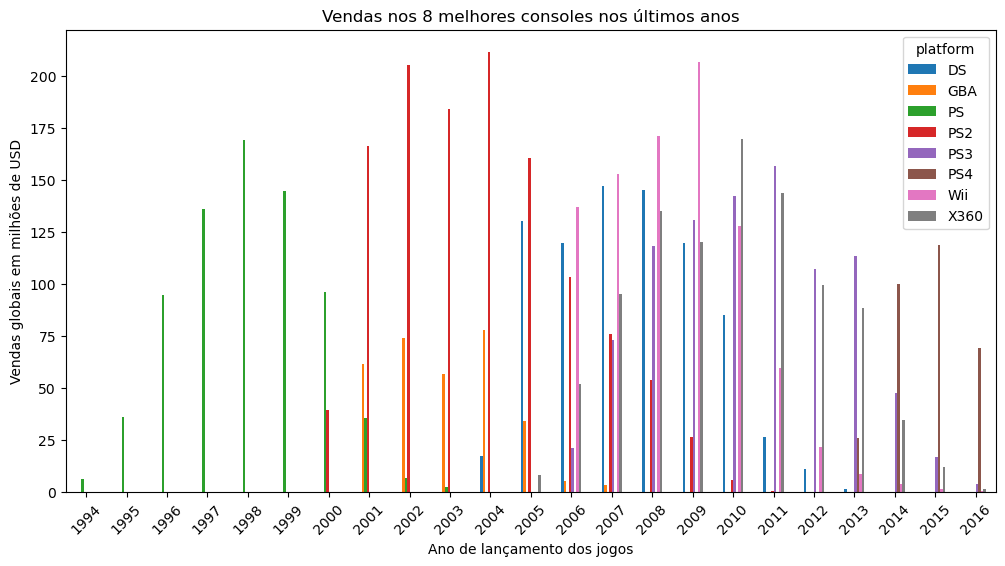

In [27]:
df_plat_year.plot(x='year_of_release', kind='bar', title='Vendas nos 8 melhores consoles nos últimos anos', figsize=(12, 6), rot=45)

plt.xlabel('Ano de lançamento dos jogos')
plt.ylabel('Vendas globais em milhões de USD')

plt.show()

As plataformas costumam ter uma vida de 10 a 11 anos, com melhor desempenho nos 4 ou 5 anos centrais. Geralmente as plataformas disputam com outros 3 ou 4 fortes concorrentes.

## Período relevante de dados

Serão considerados dados a partir de 2013, pois é o ano de lançamento do console PS4, que é o mais relevante player nos últimos anos

In [28]:
df_filtered_games = df_games[df_games['year_of_release'] > 2012]
df_filtered_games.info()
df_filtered_games.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.994363,7.12633,NR,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.000000,2.60000,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.000000,2.60000,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,68.994363,7.12633,NR,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,8.58


## Plataformas líderes em vendas

In [29]:
leader_plats = df_filtered_games.groupby('platform')['total_sales'].sum().sort_values()
leader_plats

platform
DS        1.54
PSP       3.50
Wii      13.66
PSV      32.99
PC       39.43
WiiU     64.63
X360    136.80
3DS     143.25
XOne    159.32
PS3     181.43
PS4     314.14
Name: total_sales, dtype: float64

In [30]:
leader_plats_list = leader_plats.index.tolist()
df_leader_plats = df_filtered_games.query("platform in @leader_plats_list")
df_leader_year = df_leader_plats.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
df_leader_year = df_leader_year.reset_index()
df_leader_year.drop([0], inplace=True)
print(df_leader_year)

platform  year_of_release    3DS  DS     PC    PS3     PS4   PSP    PSV   Wii  \
1                    2014  43.76 NaN  13.28  47.76  100.00  0.24  11.90  3.75   
2                    2015  27.78 NaN   8.52  16.82  118.90  0.12   6.25  1.14   
3                    2016  15.14 NaN   5.25   3.60   69.25   NaN   4.25  0.18   

platform   WiiU   X360   XOne  
1         22.03  34.74  54.07  
2         16.35  11.96  60.14  
3          4.60   1.52  26.15  


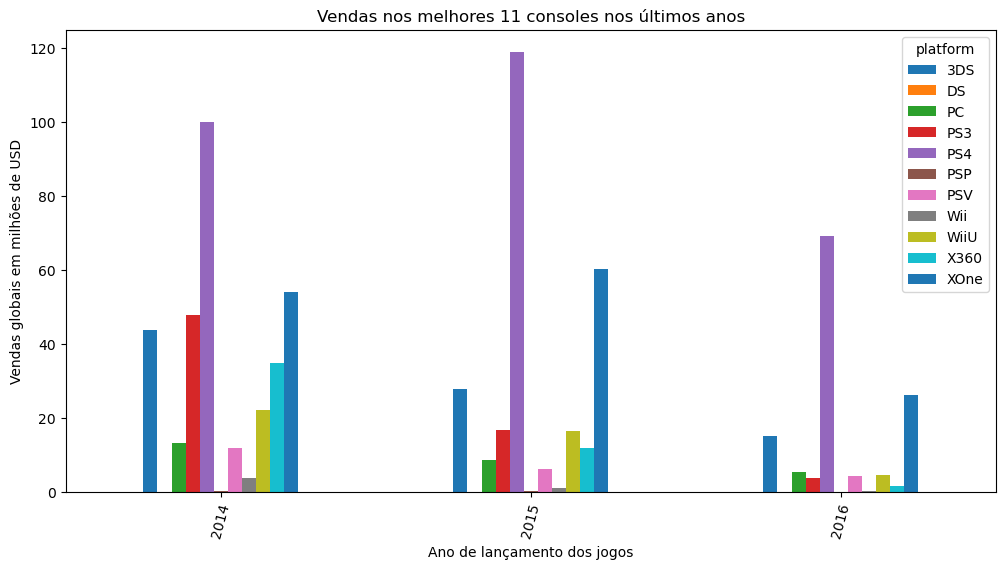

In [31]:
df_leader_year.plot(x='year_of_release', kind='bar', title='Vendas nos melhores 11 consoles nos últimos anos',  figsize=(12, 6), rot=75)

plt.xlabel('Ano de lançamento dos jogos')
plt.ylabel('Vendas globais em milhões de USD')

plt.show()

As plataformas em crescimento são XOne e PS4

## Vendas globais em todas as plataformas

In [32]:
df_leader_games = df_leader_plats.groupby(['name', 'platform'])['total_sales'].sum().unstack()
df_leader_games = df_leader_games.reset_index()
print(df_leader_games)

platform                                           name   3DS    DS  PC  PS3  \
0                                        Beyblade Burst  0.03   NaN NaN  NaN   
1                                     Fire Emblem Fates  1.67   NaN NaN  NaN   
2                                  Frozen: Olaf's Quest  0.59  0.51 NaN  NaN   
3                            Haikyu!! Cross Team Match!  0.04   NaN NaN  NaN   
4                                          1/2 Summer +   NaN   NaN NaN  NaN   
...                                                 ...   ...   ...  ..  ...   
1258                                  Zoo Tycoon (2013)   NaN   NaN NaN  NaN   
1259                         Zumba Fitness: World Party   NaN   NaN NaN  NaN   
1260      Zyuden Sentai Kyoryuger: Game de Gaburincho!!  0.05   NaN NaN  NaN   
1261                        htoL#NiQ: The Firefly Diary   NaN   NaN NaN  NaN   
1262                               inFAMOUS: Second Son   NaN   NaN NaN  NaN   

platform   PS4   PSP   PSV   Wii  WiiU 

<Axes: >

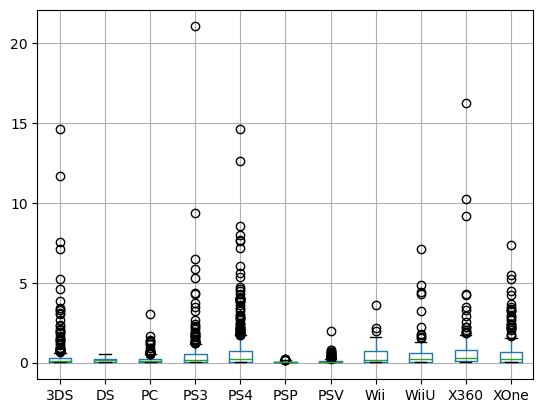

In [33]:
df_leader_games.drop('name', axis=1).boxplot()

É visto que a maioria dos jogos vende muito pouco, enquanto existem os outliers que costumam vender mais.

In [34]:
df_mean_games = df_leader_plats.groupby('platform')['total_sales'].mean()
df_mean_games = df_mean_games.reset_index()
print(df_mean_games)

   platform  total_sales
0       3DS     0.472772
1        DS     0.192500
2        PC     0.208624
3       PS3     0.525884
4       PS4     0.801378
5       PSP     0.052239
6       PSV     0.092151
7       Wii     0.593913
8      WiiU     0.562000
9      X360     0.735484
10     XOne     0.645020


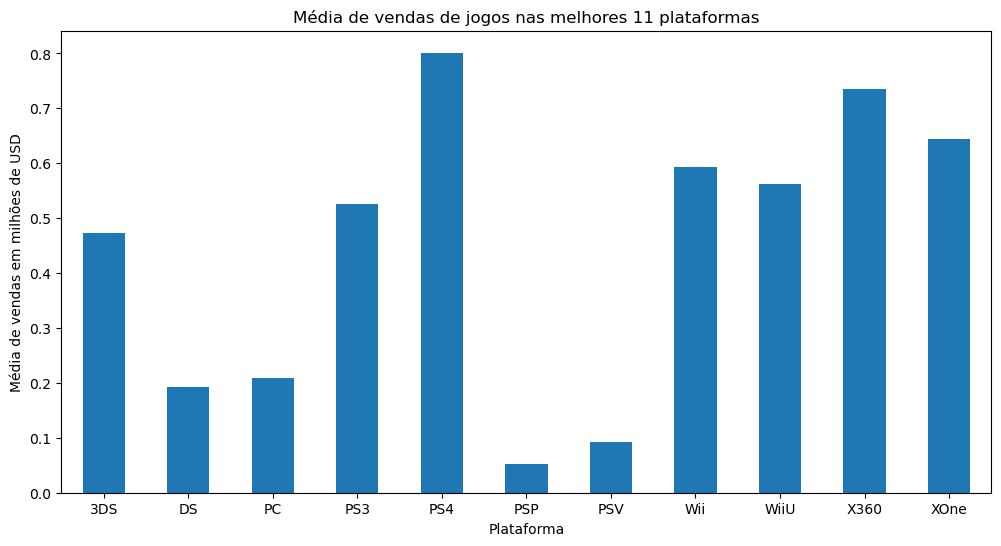

In [35]:
df_mean_games.plot(x='platform', y='total_sales', kind='bar', title='Média de vendas de jogos nas melhores 11 plataformas', figsize=(12, 6), rot=0, legend=False)

plt.xlabel('Plataforma')
plt.ylabel('Média de vendas em milhões de USD')

plt.show()

Em média, os jogos vendem bem menos de 1 milhão mesmo nas melhores plataformas

## Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular?

### Avaliações de usuários

In [36]:
df_filtered_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.994363,7.12633,NR,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.000000,2.60000,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.000000,2.60000,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,68.994363,7.12633,NR,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,8.58


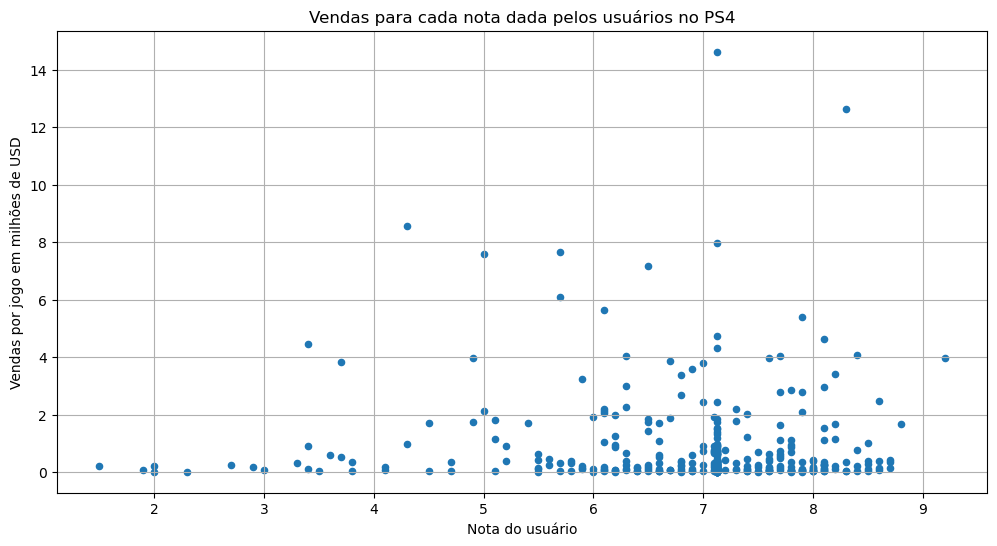

In [37]:
df_filtered_games[df_filtered_games['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(12, 6), grid=True, title='Vendas para cada nota dada pelos usuários no PS4')

plt.xlabel('Nota do usuário')
plt.ylabel('Vendas por jogo em milhões de USD')

plt.show()

In [38]:
# Calculando o coeficiente de correlação entre a nota do usuáio e o total de vendas
user_sales_corr = df_filtered_games['user_score'].corr(df_filtered_games['total_sales'])
print(user_sales_corr)

-0.03860026805198467


Podemos ver que jogos com nota acima de 7 costumam ter vendas maiores que a maioria, mas o coeficiente de relação é baixo mesmo assim.

### Avaliações dos críticos

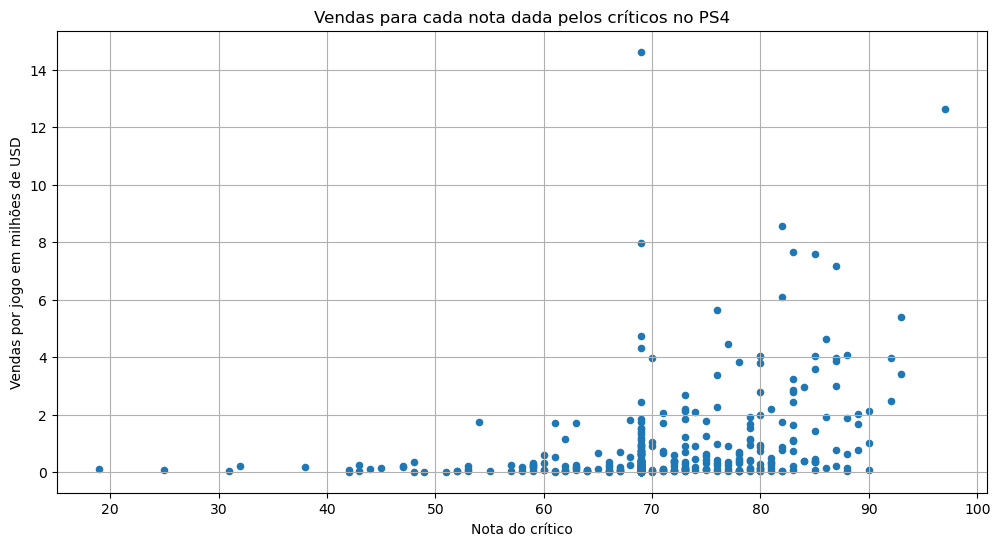

In [39]:
df_filtered_games[df_filtered_games['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12, 6), grid=True, title='Vendas para cada nota dada pelos críticos no PS4')

plt.xlabel('Nota do crítico')
plt.ylabel('Vendas por jogo em milhões de USD')

plt.show()

In [40]:
# Calculando o coeficiente de correlação entre a nota do usuáio e o total de vendas
critic_sales_corr = df_filtered_games['critic_score'].corr(df_filtered_games['total_sales'])
print(critic_sales_corr)

0.2715067331703888


Fica claro que jogos com notas acima de 68 é que começam a se destacar em vendas, e com o coeficiente de relação moderado-baixo em 0.27, indica que realmente há uma relação, mesmo que não tão forte.

## Comparando a venda dos mesmos jogos em diferentes plataformas 

In [41]:
df_filtered_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62


In [42]:
dup_games = df_filtered_games[df_filtered_games['name'].duplicated(keep=False)]
dup_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.000000,2.60000,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,68.994363,7.12633,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,NR,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.000000,7.60000,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.994363,7.12633,NR,0.01


In [43]:
dup_games = dup_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
dup_games

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,2014 FIFA World Cup Brazil,PS3,0.61
3,2014 FIFA World Cup Brazil,X360,0.43
4,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23
...,...,...,...
1438,Zombie Army Trilogy,XOne,0.11
1439,Zoo Tycoon (2013),X360,0.09
1440,Zoo Tycoon (2013),XOne,0.36
1441,Zumba Fitness: World Party,Wii,0.23


In [44]:
comparison = dup_games.pivot(index='name', columns='platform', values='total_sales')
print(comparison)

platform                              3DS    DS  PC   PS3   PS4  PSP   PSV  \
name                                                                         
 Frozen: Olaf's Quest                0.59  0.51 NaN   NaN   NaN  NaN   NaN   
2014 FIFA World Cup Brazil            NaN   NaN NaN  0.61   NaN  NaN   NaN   
3rd Super Robot Wars Z Jigoku Hen     NaN   NaN NaN  0.23   NaN  NaN  0.19   
3rd Super Robot Wars Z: Tengoku-Hen   NaN   NaN NaN  0.15   NaN  NaN  0.19   
7 Days to Die                         NaN   NaN NaN   NaN  0.14  NaN   NaN   
...                                   ...   ...  ..   ...   ...  ...   ...   
Zero Escape: Zero Time Dilemma       0.08   NaN NaN   NaN   NaN  NaN  0.06   
ZombiU                                NaN   NaN NaN   NaN  0.06  NaN   NaN   
Zombie Army Trilogy                   NaN   NaN NaN   NaN  0.20  NaN   NaN   
Zoo Tycoon (2013)                     NaN   NaN NaN   NaN   NaN  NaN   NaN   
Zumba Fitness: World Party            NaN   NaN NaN   NaN   NaN 

In [45]:
comparison['total'] = dup_games.groupby('name')['total_sales'].sum()
comparison

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total
name,,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.10
2014 FIFA World Cup Brazil,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN,1.04
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.42
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.34
7 Days to Die,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.05,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
Zero Escape: Zero Time Dilemma,0.08,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,0.14
ZombiU,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,0.01,0.07
Zombie Army Trilogy,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,NaN,0.11,0.31


In [46]:
comparison_top = comparison.sort_values(by='total', ascending=False).reset_index().loc[:9]
comparison_top

platform,name,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,total
0,Grand Theft Auto V,NaN,NaN,1.17,21.05,12.62,NaN,NaN,NaN,NaN,16.27,5.47,56.58
1,Call of Duty: Ghosts,NaN,NaN,0.69,9.36,3.83,NaN,NaN,NaN,0.35,10.24,2.92,27.39
2,Call of Duty: Black Ops 3,NaN,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.70,7.39,25.67
3,Minecraft,NaN,NaN,NaN,5.27,4.32,NaN,1.96,NaN,0.67,9.18,2.76,24.16
4,Call of Duty: Advanced Warfare,NaN,NaN,0.41,4.36,7.66,NaN,NaN,NaN,NaN,4.28,5.26,21.97
5,FIFA 15,0.46,NaN,0.29,4.28,6.08,NaN,0.60,0.56,NaN,2.92,2.18,17.37
6,FIFA 14,0.23,NaN,0.40,6.46,3.01,0.19,0.41,0.38,NaN,4.22,1.16,16.46
7,FIFA 16,NaN,NaN,0.20,2.70,8.58,NaN,NaN,NaN,NaN,1.57,3.25,16.30
8,Battlefield 4,NaN,NaN,1.36,3.49,3.58,NaN,NaN,NaN,NaN,3.49,2.02,13.94
9,Assassin's Creed IV: Black Flag,NaN,NaN,0.65,3.71,2.86,NaN,NaN,NaN,0.29,3.31,2.24,13.06


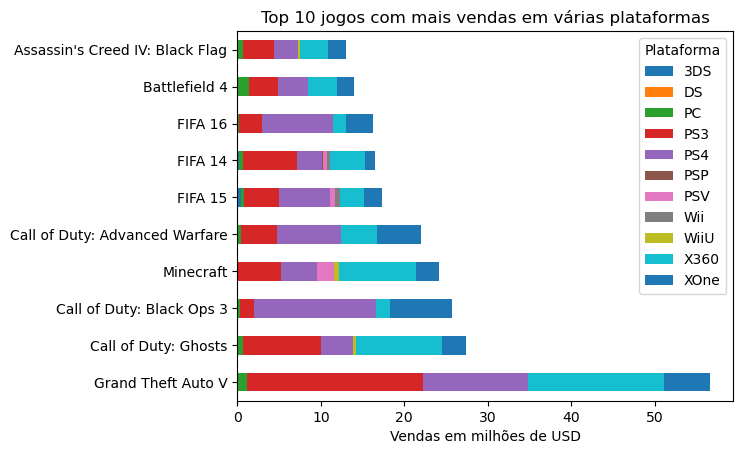

In [48]:
comparison_top.drop('total', axis=1).plot(x='name', kind='barh', stacked=True, title='Top 10 jogos com mais vendas em várias plataformas')

plt.xlabel('Vendas em milhões de USD')
plt.ylabel('')
plt.legend(title='Plataforma')

plt.show()

É inegável que o jogo GTA V é um fenômeno em todas as plataformas.

## Distribuição de jogos por gênero

In [49]:
# Calculando o total de vendas por gênero
df_filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

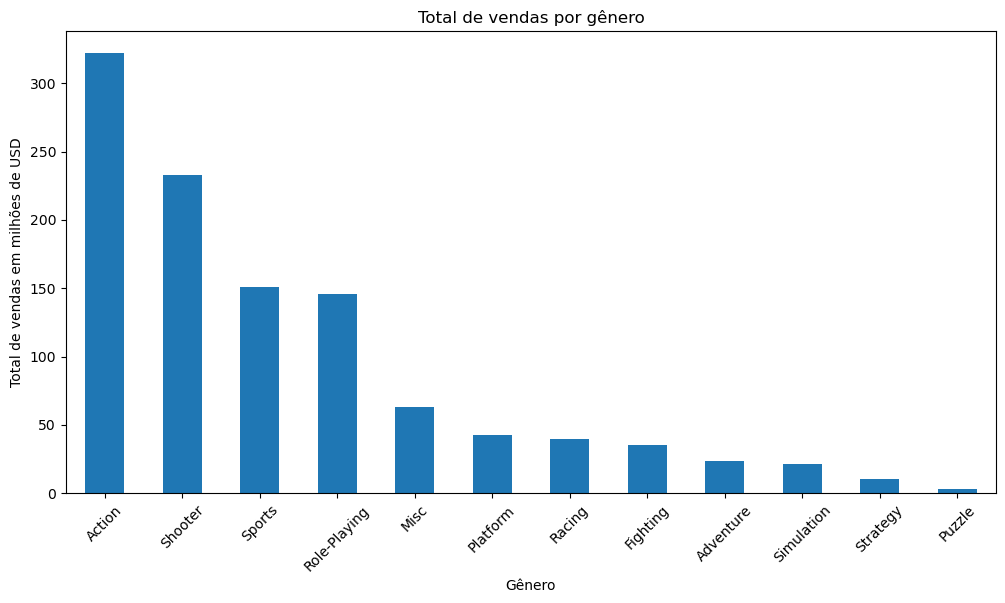

In [50]:
df_filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(x='genre', kind='bar', title='Total de vendas por gênero', figsize=(12, 6), rot=45, legend=False)

plt.xlabel('Gênero')
plt.ylabel('Total de vendas em milhões de USD')

plt.show()

In [51]:
# Calculando a média de vendas por gênero
df_filtered_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
Name: total_sales, dtype: float64

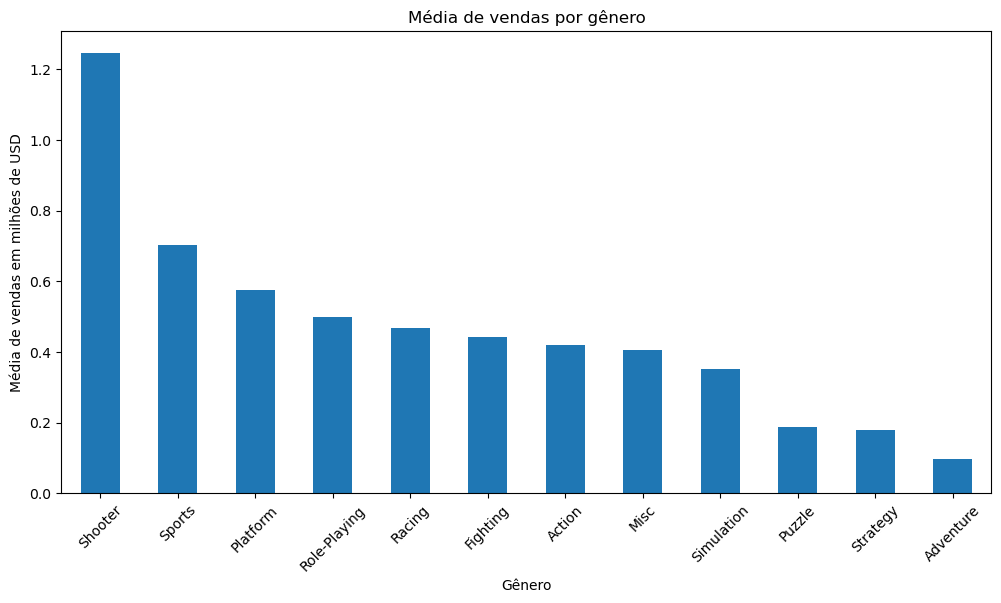

In [52]:
df_filtered_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(x='genre', kind='bar', title='Média de vendas por gênero', figsize=(12, 6), rot=45, legend=False)

plt.xlabel('Gênero')
plt.ylabel('Média de vendas em milhões de USD')

plt.show()

Apesar dos jogos de ação terem um total de vendas maior, eles vendem, em média, menos do que a maioria dos jogos das outras categorias. Desta forma faz mais sentido apostar na criação de jogos do gênero Shooter, pois além de figurarem em 2º no total de vendas, estão em 1º na média de vendas por jogo. Outra boa posta seria nos jogos de Sports, pois figuram em 3º no total e em 2º na média.

# Criando um perfil de usuário para cada região

## Criando dataframes das regiões Japão, América do Norte e Europa

In [53]:
df_filtered_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62


In [54]:
df_jp = df_filtered_games[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]
df_jp.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,97.000000,8.20000,M
23,Grand Theft Auto V,X360,2013,Action,0.06,97.000000,8.10000,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,68.994363,7.12633,NR
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,68.994363,7.12633,NR
42,Grand Theft Auto V,PS4,2014,Action,0.38,97.000000,8.30000,M


In [55]:
df_na = df_filtered_games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]
df_na.head()

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,97.000000,8.20000,M
23,Grand Theft Auto V,X360,2013,Action,9.66,97.000000,8.10000,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,68.994363,7.12633,NR
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,68.994363,7.12633,NR
42,Grand Theft Auto V,PS4,2014,Action,3.96,97.000000,8.30000,M


In [56]:
df_eu = df_filtered_games[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]
df_eu.head()

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,9.09,97.000000,8.20000,M
23,Grand Theft Auto V,X360,2013,Action,5.14,97.000000,8.10000,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,68.994363,7.12633,NR
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.19,68.994363,7.12633,NR
42,Grand Theft Auto V,PS4,2014,Action,6.31,97.000000,8.30000,M


## Encontrando as 5 plataformas principais e analisando variações regionais

In [57]:
jp_top = df_jp.groupby('platform')['jp_sales'].sum().nlargest(5).reset_index()
jp_top

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [58]:
na_top = df_na.groupby('platform')['na_sales'].sum().nlargest(5).reset_index()
na_top

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [59]:
eu_top = df_eu.groupby('platform')['eu_sales'].sum().nlargest(5).reset_index()
eu_top

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [60]:
merged_sales = jp_top.merge(na_top, on='platform', how='outer').merge(eu_top, on='platform', how='outer')
merged_sales

,platform,jp_sales,na_sales,eu_sales
0,3DS,67.81,38.20,30.96
1,PS3,23.35,63.50,67.81
2,PS4,15.96,108.74,141.09
3,PSV,18.59,NaN,NaN
4,WiiU,10.88,NaN,NaN
5,X360,NaN,81.66,42.52
6,XOne,NaN,93.12,51.59


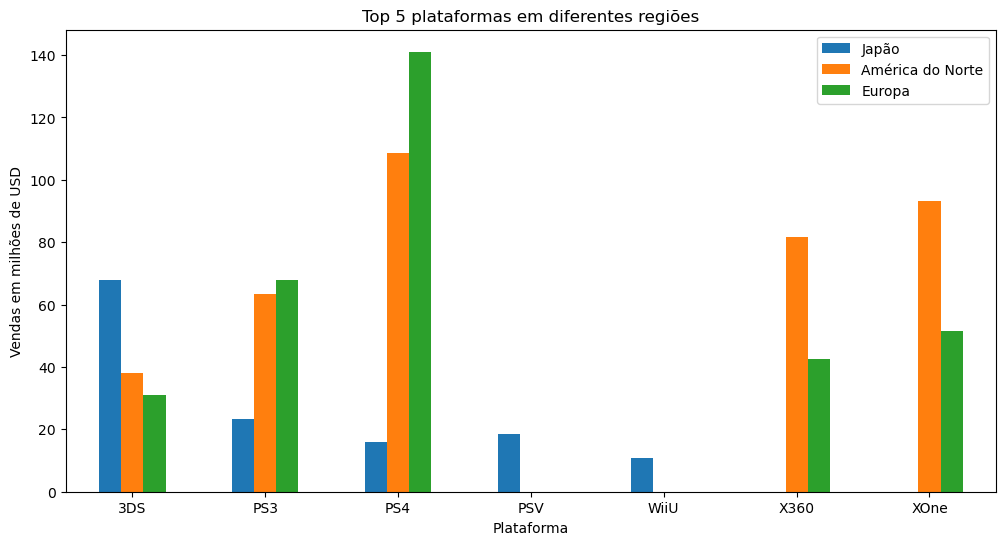

In [61]:
merged_sales.plot(x='platform', kind='bar', figsize=(12, 6), rot=0, title='Top 5 plataformas em diferentes regiões', xlabel='Plataforma', ylabel='Vendas em milhões de USD')
plt.legend(['Japão', 'América do Norte', 'Europa'])
plt.show()

Enquanto o Japão tem uma preferência por plataformas portáteis e consoles japoneses, os ocidentais preferem consoles de mesa, além de consumirem jogos de plataformas ocidentais com muito mais frequência que os japoneses.

## Encontrando os 5 principais gêneros e analisando variações regionais

In [62]:
jp_genre = df_jp.groupby('genre')['jp_sales'].sum().nlargest(5).reset_index()
jp_genre

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


In [63]:
na_genre = df_na.groupby('genre')['na_sales'].sum().nlargest(5).reset_index()
na_genre

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


In [64]:
eu_genre = df_eu.groupby('genre')['eu_sales'].sum().nlargest(5).reset_index()
eu_genre

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


In [65]:
merged_genres = jp_genre.merge(na_genre, on='genre', how='outer').merge(eu_genre, on='genre', how='outer')
merged_genres

,genre,jp_sales,na_sales,eu_sales
0,Action,40.49,126.05,118.13
1,Fighting,7.65,NaN,NaN
2,Misc,9.20,27.49,NaN
3,Racing,NaN,NaN,20.19
4,Role-Playing,51.04,46.40,36.97
5,Shooter,6.61,109.74,87.86
6,Sports,NaN,65.27,60.52


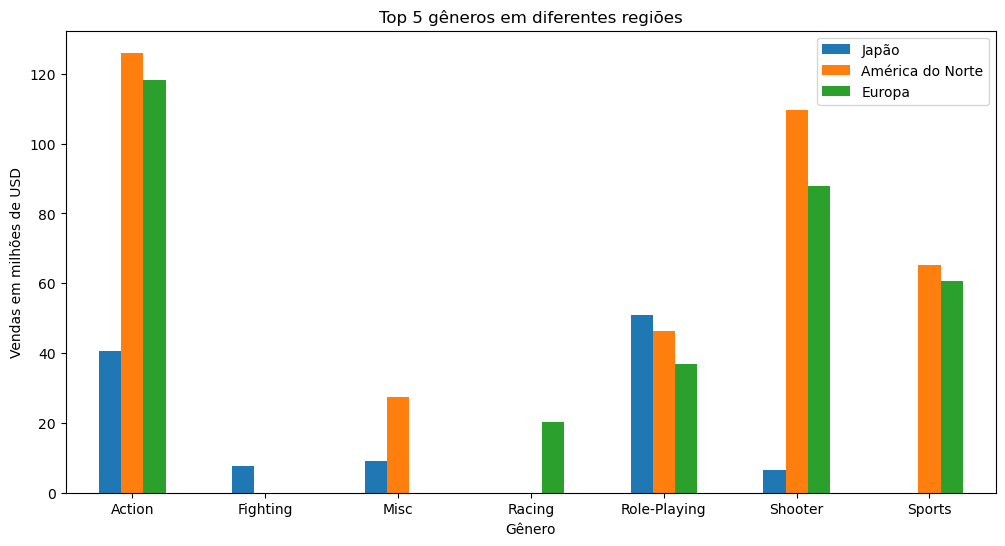

In [66]:
merged_genres.plot(x='genre', kind='bar', figsize=(12, 6), rot=0, title='Top 5 gêneros em diferentes regiões', xlabel='Gênero', ylabel='Vendas em milhões de USD')
plt.legend(['Japão', 'América do Norte', 'Europa'])
plt.show()

Enquanto jogos de ação e RPG são adorados em todas as regiões, vemos que os japoneses não são fãs de Shooter ou jogos de esporte, e esses são justamente 2 dos 3 gêneros mais adorados pelos ocidentais.

## Verificando se as classificações do ESRB afetam as vendas em cada região

In [67]:
df_jp.head()

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,0.98,97.000000,8.20000,M
23,Grand Theft Auto V,X360,2013,Action,0.06,97.000000,8.10000,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,68.994363,7.12633,NR
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,4.35,68.994363,7.12633,NR
42,Grand Theft Auto V,PS4,2014,Action,0.38,97.000000,8.30000,M


In [68]:
jp_rating = df_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating

,rating,jp_sales
0,NR,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


In [69]:
na_rating = df_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_rating

,rating,na_sales
0,M,165.21
1,NR,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


In [70]:
eu_rating = df_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating

,rating,eu_sales
0,M,145.32
1,E,83.36
2,NR,78.91
3,E10+,42.69
4,T,41.95


In [71]:
merged_ratings = jp_rating.merge(na_rating, on='rating', how='outer').merge(eu_rating, on='rating', how='outer')
merged_ratings

,rating,jp_sales,na_sales,eu_sales
0,E,15.14,79.05,83.36
1,E10+,5.89,54.24,42.69
2,M,14.11,165.21,145.32
3,NR,85.05,89.42,78.91
4,T,20.59,49.79,41.95


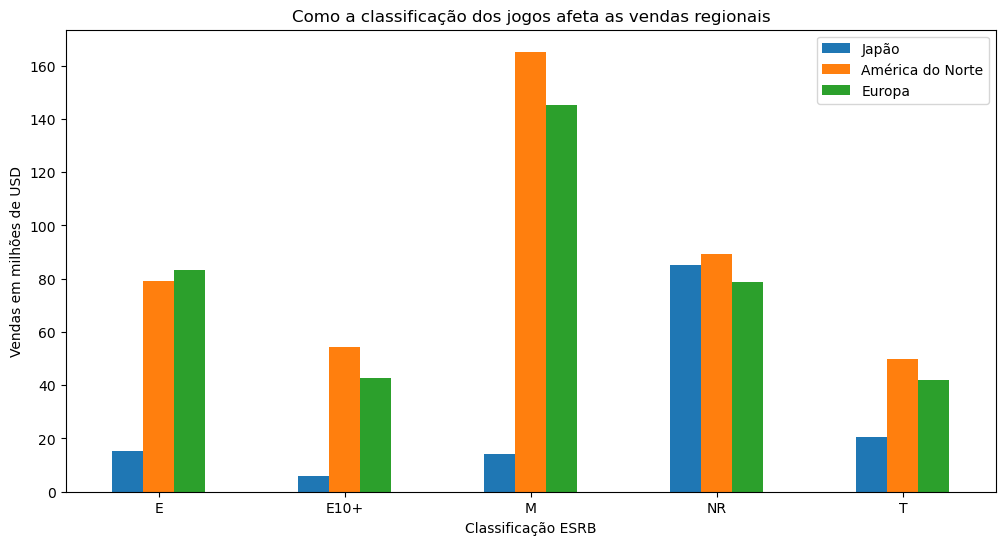

In [72]:
merged_ratings.plot(x='rating', kind='bar', figsize=(12, 6), rot=0, title='Como a classificação dos jogos afeta as vendas regionais', xlabel='Classificação ESRB', ylabel='Vendas em milhões de USD')
plt.legend(['Japão', 'América do Norte', 'Europa'])
plt.show()

Existem muitos jogos sem classificação, e parece que esses jogos vendem bem em todas as regiões, principalmente no Japão. Como a ESRB é uma empresa norte americana e os japoneses têm preferência por empresas locais, podemos compreender o motivo de não haver muitos jogos japoneses classificados pela ESRB. A maioria das vendas ocidentais está concentrada nos jogos com classificação M, o que indica que a maior parte do público do ocidente deve ser formada por adolescentes e jovens adultos.

# Testando hipóteses

## As avaliações médias dos usuários de Xbox One e PC são as mesmas?

Hipótese nula: As avaliações médias dos usuários das plataformas Xbox One e PC são as mesmas

Hipótese alternativa: As avaliações médias dos usuários das plataformas Xbox One e PC são diferentes

alpha = 0.05

In [73]:
df_filtered_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62


In [74]:
array_xone = df_filtered_games[df_filtered_games['platform'] == 'XOne']['user_score']
array_pc = df_filtered_games[df_filtered_games['platform'] == 'PC']['user_score']

### Calculando variância e desvio padrão antes de iniciar o teste

In [75]:
print('Variância Xbox One:', np.var(array_xone), '\nVariância PC:', np.var(array_pc))

Variância Xbox One: 1.4683861598466723 
Variância PC: 2.581957453579709


In [76]:
print('Desvio padrão Xbox One:', np.std(array_xone), '\nDesvio padrão PC:', np.std(array_pc))

Desvio padrão Xbox One: 1.2117698460708917 
Desvio padrão PC: 1.606847053574082


Como a variância é significativamente diferente entre as amostras, usaremos equal_var=False

### Realizando teste de hipótese

In [77]:
alpha = 0.05

results = st.ttest_ind(array_xone, array_pc, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

Valor-p: 0.06817560404247579
Não podemos rejeitar a hipótese nula


## As avaliações médias de usuários para os gêneros Action e Sports são as mesmas?

Hipótese nula: As classificações médias de usuários para os gêneros Action e Sports são iguais

Hipótese alternativa: As classificações médias de usuários para os gêneros Action e Sports são diferentes

alpha = 0.05

In [78]:
array_action = df_filtered_games[df_filtered_games['genre'] == 'Action']['user_score']
array_sports = df_filtered_games[df_filtered_games['genre'] == 'Sports']['user_score']

### Calculando variância e desvio padrão antes de iniciar o teste

In [79]:
print('Variância Action:', np.var(array_action), '\nVariância Sports:', np.var(array_sports))

Variância Action: 0.9170757246953958 
Variância Sports: 3.0358082964761564


In [80]:
print('Desvio padrão Action:', np.std(array_action), '\nDesvio padrão Sports:', np.std(array_sports))

Desvio padrão Action: 0.9576407075179061 
Desvio padrão Sports: 1.7423571093424437


Como a variância é significativamente diferente entre as amostras, usaremos equal_var=False

In [81]:
alpha = 0.10

results = st.ttest_ind(array_sports, array_pc, equal_var=False)

print('Valor-p:', results.pvalue)

if results.pvalue < alpha:
    print('Rejeitamos a hipótese nula')
else:
    print('Não podemos rejeitar a hipótese nula')

Valor-p: 2.7869507305743665e-05
Rejeitamos a hipótese nula


# Conclusão geral

* É bom ter atenção aos consoles para o qual serão vendidos os jogos e em cada região. Focar nas vendas em portáteis para os japoneses e em principalmente em consoles de mesa para os ocidentais;

* Além disso é bom dar atenção aos console em ascenção, como Xbox One e PS4, principalmente no ocidente. O 3DS ainda vende bem no Japão, mesmo chegando próximo ao seu ciclo de vida, então ainda vale a pena vender jogos para ele. O PS3 e o X360 ainda merecem atenção, pois continuam vendendo mesmo após terem encerrado seu ciclo;

* Jogos com nota de usuários e críticos acima de 70% costumam vender bem melhor, então mesmo que o jogo seja um lançamento só com notas de críticos, vale apena arriscar em vendê-lo se a nota for maior que 70;

* Jogos que vendem bem em uma plataforma costumam vender bem em todas as outras plataformas nas quais está disponível;

* Como as vendas de jogos dos gênero Ação, Esporte, Shooter e RPG são as maiores na maioria das plataformas, é interessante focar na venda destes jogos;

* Jogos sem classificação ESRB podem vender bem, mas não é uma regra. Já os jogos com classificação M são os que mais vendem, por isso é bom tentar supor a classificação de jogos NR, pois se eles seriam um jogo M, provavelmente venderiam bem;

* Usuários de Xbox One e PC podem ter gostos parecidos, pois as avaliações médias nessas plataformas provavelmente também são parecidas;

* Usuários que compram jogos de Esporte, provavelmente não compram jogos de ação.